### DSPT6 - Adding Data Science to a Web Application

The purpose of this notebook is to demonstrate:
- Simple online analysis of data from a user of the Twitoff app or an API
- Train a more complicated offline model, and serialize the results for online use

In [16]:
import sqlite3
import pickle
import pandas as pd

In [17]:
# Connect to sqlite database
conn = sqlite3.connect('/Users/codyreece/Desktop/Repos/TwitOff/twitoff/twitoff.db')

In [18]:
def get_data(query, conn):
    '''Function to get data from SQLite DB'''
    
    cursor = conn.cursor()
    result = cursor.execute(query).fetchall()

    # Get columns from cursor object
    columns = list(map(lambda x: x[0], cursor.description))

    # Assign to DataFrame
    df = pd.DataFrame(data=result, columns=columns)
    return df

In [8]:
import pickle

sql = '''
SELECT 
	tweet.id,
	tweet.tweet, 
	tweet.embedding,
	user.username
FROM tweet
JOIN user on tweet.user_id = user.id;
'''

df = get_data(sql, conn)
df['embedding_decoded'] = df.embedding.apply(lambda x: pickle.loads(x))
print(df.shape)
df.sample(10)

(663, 5)


,id,tweet,embedding,username,embedding_decoded
145,1133366998874804224,MacKenzie is going to be amazing and thoughtfu...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JeffBezos,"[-0.08970084, 0.20976648, -0.19089942, -0.0673..."
2,743804334396170240,Look for one-chute-out test starting about 7 m...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JeffBezos,"[-0.050928, 0.13946757, -0.067821085, 0.062432..."
199,1204964350936731649,Picture perfect flight @BlueOrigin. And this v...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JeffBezos,"[0.019206014, 0.114930496, -0.077709906, -0.09..."
73,915046109298520064,Amazon plane packed with donation of critical ...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JeffBezos,"[0.00032032834, 0.1259034, -0.06100049, -0.052..."
575,1312883193939279872,It’s time we build an economy where everyone g...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JoeBiden,"[-0.0745718, 0.21935098, -0.09190432, -0.01092..."
225,1219093283265138688,"Hey, India. We’re rolling out our new fleet of...",b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JeffBezos,"[0.031138683, 0.23864304, 0.007979002, -0.2018..."
622,1313464290280534017,There’s no better person to convey what’s at s...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JoeBiden,"[-0.030412894, 0.26141876, -0.100480415, 0.009..."
350,1308123412846567426,I’m proud to endorse @Bradshaw2020's grassroot...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,BernieSanders,"[-0.028717875, 0.13898844, -0.08603855, -0.017..."
179,1196923893065359365,"In Abu Dhabi this week, the world committed $2...",b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,BillGates,"[-0.056705132, 0.22735384, -0.021146351, -0.02..."
41,838748139964272640,1st BE-4 engine fully assembled. 2nd and 3rd f...,b'\x80\x05\x95\xee\x11\x00\x00\x00\x00\x00\x00...,JeffBezos,"[0.03654325, 0.073873684, -0.04710921, 0.03106..."


In [19]:
pickle.loads(df.embedding.iloc[0])

[-0.133187,
 0.45467547,
 -0.00989832,
 0.035551026,
 -0.07856627,
 0.06057265,
 0.2390099,
 -0.13835788,
 0.02841813,
 1.547836,
 -0.21632695,
 -0.06464427,
 0.04452059,
 -0.15252791,
 -0.011007457,
 0.09562895,
 -0.21098231,
 0.99990594,
 -0.1083419,
 -0.07252909,
 -0.065781996,
 -0.028986452,
 0.06241819,
 0.02831427,
 0.1913434,
 0.24747568,
 -0.14590196,
 -0.03830232,
 0.29903308,
 0.044983845,
 -0.1344915,
 -0.083733685,
 0.119221896,
 0.2510347,
 -0.17649728,
 -0.03934854,
 -0.106419854,
 0.18493757,
 -0.023651324,
 0.16044217,
 -0.11935236,
 0.028703189,
 -0.14876097,
 0.17434269,
 0.07948204,
 0.19779935,
 -0.018305715,
 -0.039069906,
 -0.11172195,
 -0.03309604,
 0.16640818,
 0.11913211,
 -0.1150929,
 0.107780606,
 0.018172441,
 0.050398193,
 -0.0200027,
 -0.054078005,
 -0.054210022,
 0.0036655047,
 -0.019724362,
 -0.15057597,
 -0.08332205,
 0.13497363,
 -0.050828278,
 -0.1909884,
 0.09378154,
 0.054029357,
 0.01386027,
 0.19132441,
 -0.0040262435,
 -0.17155623,
 0.045013133,


In [20]:
df.username.value_counts()

JeffBezos          185
JoeBiden           174
BillGates          146
BernieSanders      138
elonmusk            19
realDonaldTrump      1
Name: username, dtype: int64

In [21]:
import numpy as np

user1_embeddings = df.embedding_decoded[df.username == 'BillGates']
user2_embeddings = df.embedding_decoded[df.username == 'JeffBezos']
embeddings = pd.concat([user1_embeddings, user2_embeddings])

embeddings_df = pd.DataFrame(embeddings.to_list(),
                             columns=[f'dom{i}' for i in range(300)])
labels = np.concatenate([np.ones(len(user1_embeddings)),
                         np.zeros(len(user2_embeddings))])
print(embeddings_df.shape, labels.shape)

(331, 300) (331,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embeddings_df, labels, test_size=0.25, random_state=42
)
print(X_train.shape, X_test.shape)

(248, 300) (83, 300)


In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
%timeit log_reg.fit(X_train, y_train)

13.1 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        44
         1.0       0.92      0.92      0.92        39

    accuracy                           0.93        83
   macro avg       0.93      0.93      0.93        83
weighted avg       0.93      0.93      0.93        83



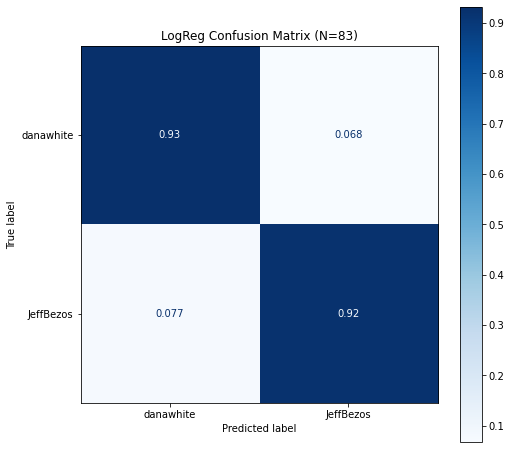

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(log_reg, X_test, y_test, 
                      normalize='true', cmap='Blues', 
                      display_labels=['danawhite', 'JeffBezos'], ax=ax)
plt.title(f'LogReg Confusion Matrix (N={X_test.shape[0]})');

In [26]:
import spacy

# Load SpaCy pre-trained model
nlp = spacy.load('en_core_web_md', disable=['tagger', 'parser'])

def vectorize_tweet(nlp, tweet_text):
    '''This function returns the SpaCy embeddings for an input text'''
    return list(nlp(tweet_text).vector)

In [27]:
new_embedding = vectorize_tweet(nlp, "India, hey.")
new_embedding[0:5]

[-0.31268772, 0.3943375, -0.049049992, -0.22459224, 0.18336526]

In [28]:
log_reg.predict([new_embedding])

array([0.])

In [29]:
pickle.dump(log_reg, open("../models/log_reg.pkl", "wb"))

In [30]:
unpickled_lr = pickle.load(open("../models/log_reg.pkl", "rb"))
unpickled_lr.predict([new_embedding])

array([0.])